### Codio Activity 15.8: Tracing the Descent

**Expected Time = 45 minutes**

**Total Points = 20**

This activity focuses on visualizing the descent of the gradient to optimal parameters for a regression model.  Datasets with different parameter settings are given below, and you are to use the visualization of the path of descent to describe the parameters of the model.  As a reminder, the model is built on a simple linear dataset with noise added as: 

$$y = 4.1x + 12.5 + \epsilon$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

### The Data

Four implementations of gradient descent on the data were performed and the datasets match the following parameter settings:

- Example 1: Learning Rate = 1 with 100 iterations
- Example 2: Learning Rate = .1 with 1000 iterations
- Example 1: Learning Rate = .001 with 100 iterations
- Example 1: Learning Rate = .001 with 1000 iterations

In [2]:
#lr = 1.0 iterations = 100
ex1 = pd.read_csv('data/thetas_A.csv')
#lr = 0.1 iterations = 1000
ex2 = pd.read_csv('data/thetas_B.csv')
#lr = 0.001 iterations = 100
ex3 = pd.read_csv('data/thetas_C.csv')
#lr = 0.001 iterations = 1000
ex4 = pd.read_csv('data/thetas_D.csv')

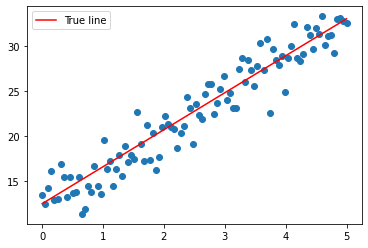

In [3]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)
plt.plot(x, 12.5 + 4.1*x, '-r', label = 'True line')
plt.legend();

In [4]:
X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1) #add the bias term
X = pd.DataFrame(X, columns = ['bias', 'x']) #create the DataFrame

In [5]:
def mse(theta0, theta1):
    '''
    Computes mean squared error using 
    parameters for intercept and coefficient 
    of a single dimension linear function.
    '''
    yhat = theta0*X.values[:, 0] + theta1*X.values[:, 1]
    error = y - yhat
    squared_error = np.sum(error**2)
    return 1/(2*X.shape[0]) * squared_error

In [6]:
theta1 = np.linspace(3, 5, 100)
theta0 = np.linspace(11, 13, 100)
T1, T0 = np.meshgrid(theta0, theta1) #defining range of possibilities for plotting

In [7]:
mse = np.vectorize(mse) #vectorizing the function

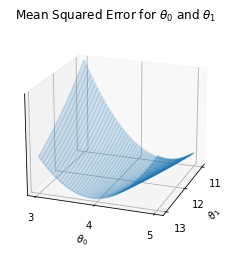

In [8]:
ax = plt.axes(projection = '3d')
ax.plot_wireframe(T1, T0, mse(T1, T0), alpha = 0.2)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$')
ax.set_zticks([])
ax.set_yticks([3, 4, 5])
ax.view_init(20, 20)
ax.set_xticks([11, 12, 13])


(2.0, 14.0)

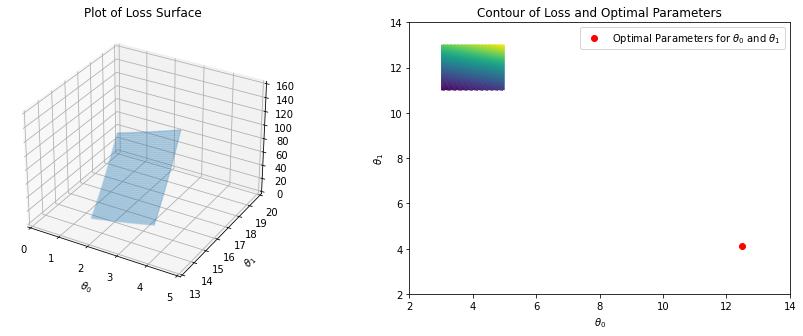

In [9]:
# ax = plt.axes(projection = '3d')
# ax.plot_wireframe(T1, T0, mse(T1, T0), alpha = 0.2)
# ax.set_xlabel(r'$\theta_1$')
# ax.set_ylabel(r'$\theta_0$')
# ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$')
# ax.set_zticks([])
# ax.set_yticks([3, 4, 5])
# ax.view_init(20, 20)
# ax.set_xticks([11, 12, 13])

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection = "3d")
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)
ax.set_xlim(0, 5)
ax.set_ylim(13, 20)
ax.set_zlim(0, 160)
ax.set_title('Plot of Loss Surface')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 100)
ax2.plot(12.5, 4.1, 'ro', label = r'Optimal Parameters for $\theta_0$ and $\theta_1$')
ax2.legend()
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_title('Contour of Loss and Optimal Parameters')
ax2.set_xlim(2, 14)
ax2.set_ylim(2, 14)

[Back to top](#-Index)

### Problem 1

#### Example Parameters lr = 1 and iterations = 100

**5 Points**


Which of the following seems to be happening based on the plot of the gradient curve below and dataset. 

- a. Converged to optimal thetas
- b. Converged to improper thetas
- c. Did not converge
- d. Will eventually converge with more iterations

Enter your solution as a string for your answer choice to `ans1` below.

(-5.0, 25.0)

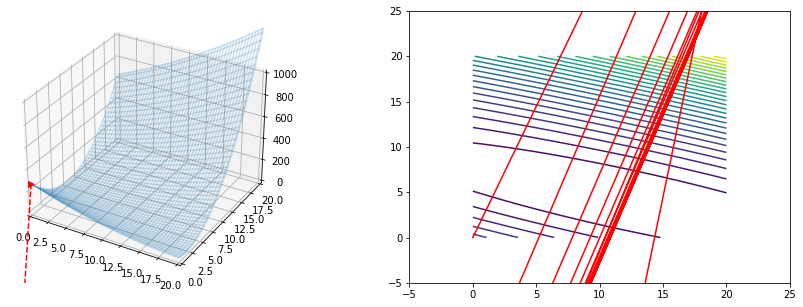

In [10]:
t1s = ex1.iloc[:, 1]#[::10]
t0s = ex1.iloc[:, 0]#[::10]
theta1 = np.linspace(0, 20, 100)
theta0 = np.linspace(0, 20, 100)
T1, T0 = np.meshgrid(theta0, theta1)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(t0s, t1s, mse(t0s, t1s), '-->', color = 'red')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 1000)
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 30)
ax2.plot(t0s, t1s, mse(t0s, t1s), color = 'red')
ax2.set_xlim(-5, 25)
ax2.set_ylim(-5, 25)

In [11]:
ex1.tail(5)

,intercept,slope
95,8.427550e+117,2.745007e+118
96,-1.456779e+119,-4.744994e+119
97,2.518175e+120,8.202155e+120
98,-4.352895e+121,-1.417817e+122
99,7.524375e+122,2.450826e+123


In [12]:
### GRADED
ans1 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
ans1 = 'c'

### ANSWER CHECK
print(ans1)

c


[Back to top](#-Index)

### Problem 2

#### Example Parameters lr = .1 with iterations = 1000

**5 Points**


Which of the following seems to be happening based on the plot of the gradient curve below and dataset. 

- a. Converged to optimal thetas 
- b. Converged to improper thetas
- c. Did not converge
- d. Will eventually converge with more iterations


Enter your solution as a string for your answer choice to `ans1` below.

(0.0, 20.0)

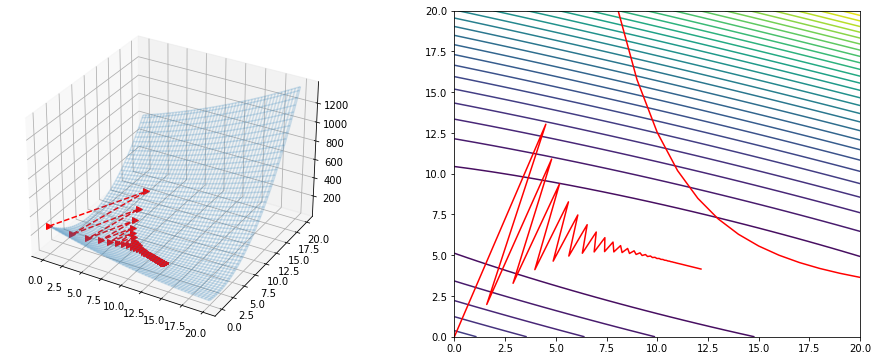

In [13]:
t1s = ex2.iloc[:, 1]
t0s = ex2.iloc[:, 0]

theta1 = np.linspace(0, 20, 100)
theta0 = np.linspace(0, 20, 100)
T0, T1 = np.meshgrid(theta0, theta1)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(t0s, t1s, mse(t0s, t1s), '-->', color = 'red')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 30)
ax2.plot(t0s, t1s, mse(t0s, t1s), color = 'red')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 20)

In [14]:
ex2.tail()

,intercept,slope
995,12.154374,4.155173
996,12.154374,4.155173
997,12.154374,4.155173
998,12.154374,4.155173
999,12.154374,4.155173


In [15]:
### GRADED
ans2 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
ans2 = 'a'

### ANSWER CHECK
print(ans2)

a


[Back to top](#-Index)

### Problem 3

#### Example Parameters lr = 0.001 iterations = 100

**5 Points**


Which of the following seems to be happening based on the plot of the gradient curve below and dataset. 

- a. Converged to optimal thetas 
- b. Converged to improper thetas
- c. Did not converge
- d. Will eventually converge with more iterations


Enter your solution as a string for your answer choice to `ans1` below.

(0.0, 20.0)

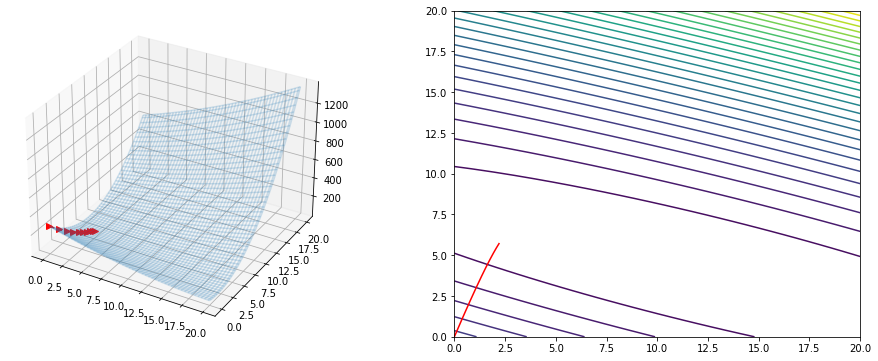

In [16]:
t1s = ex3.iloc[:, 1][::10]
t0s = ex3.iloc[:, 0][::10]
theta1 = np.linspace(0, 20, 100)
theta0 = np.linspace(0, 20, 100)
T0, T1 = np.meshgrid(theta0, theta1)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(t0s, t1s, mse(t0s, t1s), '-->', color = 'red')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 30)
ax2.plot(t0s, t1s, mse(t0s, t1s), color = 'red')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 20)

In [17]:
ex3.tail()

,intercept,slope
95,2.259136,5.827073
96,2.270567,5.848544
97,2.281868,5.869597
98,2.293041,5.890242
99,2.304088,5.910485


In [18]:
### GRADED
ans3 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
ans3 = 'd'
 
### ANSWER CHECK
print(ans3)

d


[Back to top](#-Index)

### Problem 4

#### Example Parameters lr = 0.001 iterations = 1000

**5 Points**


Which of the following seems to be happening based on the plot of the gradient curve below and dataset. 

- a. Converged to optimal thetas 
- b. Converged to improper thetas
- c. Did not converge
- d. Will eventually converge with more iterations


Enter your solution as a string for your answer choice to `ans1` below.

(0.0, 20.0)

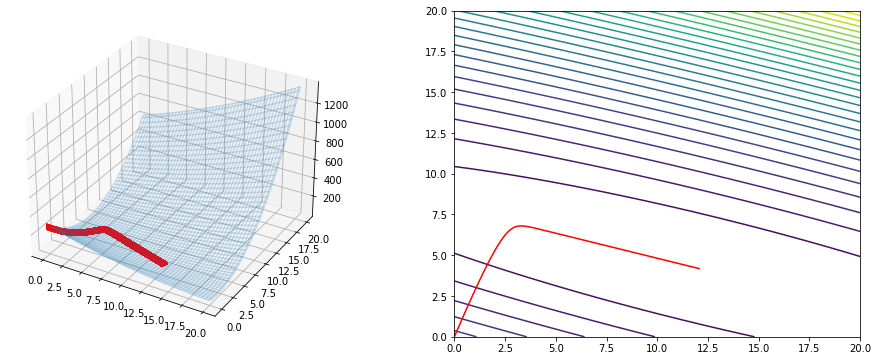

In [19]:
t1s = ex4.iloc[:, 1]
t0s = ex4.iloc[:, 0]
theta1 = np.linspace(0, 20, 100)
theta0 = np.linspace(0, 20, 100)
T0, T1 = np.meshgrid(theta0, theta1)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(t0s, t1s, mse(t0s, t1s), '-->', color = 'red')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 30)
ax2.plot(t0s, t1s, mse(t0s, t1s), color = 'red')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 20)

In [20]:
ex4.tail()

,intercept,slope
9995,12.059132,4.184414
9996,12.059177,4.184400
9997,12.059221,4.184386
9998,12.059265,4.184373
9999,12.059309,4.184359


In [21]:
### GRADED
ans4 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
ans4 = 'a'

### ANSWER CHECK
print(ans4)

a
